# 再帰関数をつかった絵を描こう

## フラクタル

フラクタルとは，図形のある一部分が全体と同じような形（これを自己相似性といいます）になっているものをいいます．ここで，自己相似性は再帰，つまり，くり返すことで表現できます．

フラクタル図形を描画も，再帰を使うことで効率的にプログラミングできます．
ただし，くり返し処理をするプログラムでは終了条件を指定しないと無限に処理が続くことになります． 

ある条件で処理を制御することをフロー制御といいます．

以下，簡単にフロー制御を説明し，そのあと亀さんにフラクタルを描いてもらいます．




# フロー制御

実際のプログラムでは，式の評価結果に基づき命令（処理）をスキップしたり，くり返したり，いくつかある命令（処理）の一つを実行したりすることができます．

このような処理のことをフロー制御と言います．

フロー制御はフローチャート（流れ図）で表すことができます．

代表的なフロー制御には
* くり返し処理
  - for, while
* if （条件分岐）
  - if, elif, else

があります．

for 文については既に説明しましたので，ここではif文について説明します．



## if と else

フロー制御で最もよく使われるのがif文です．

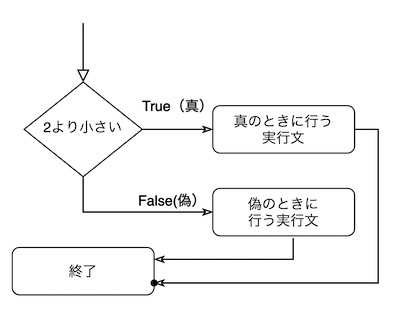

if文は，もし〜ならば〜する，処理です．具体的には次のように書きます．
```
if 条件式:
　　　　式が真のときに実行
else:
　　　　式が偽のときに実行
```
ここで条件式では２つもしくはそれ以上の値を比較して「真」か「偽」が判断されます．
このとき用いられる比較演算子には次があります．

| 演算子 | 意味 |
| ---- | ---- |
| ```==``` |  等しい |
| ```!=``` |  等しくない |
| ```>``` |  より大きい |
| ```<``` |  より小さい |
| ```>=``` |  以上 |
| ```<=``` |  以下 |

詳細は[こちら](https://docs.python.org/ja/3/tutorial/controlflow.html)をご覧下さい．

以下，if文の例です． number の値を適当に変えて試してみて下さい．

In [ ]:
number = 1
if number < 2:
    print("Number is less than two.")
else:
    print("Number is not less than two.")

Number is less than two.


## if, elif, else

先の``` if, else```はどちらか一方だけの条件分岐です．
これを複数の中からひとつを選んで実行する場合に用いるのが```elfi```になります．
英語で書くと「else if」（そうでなく，もし〜ならば）となります．

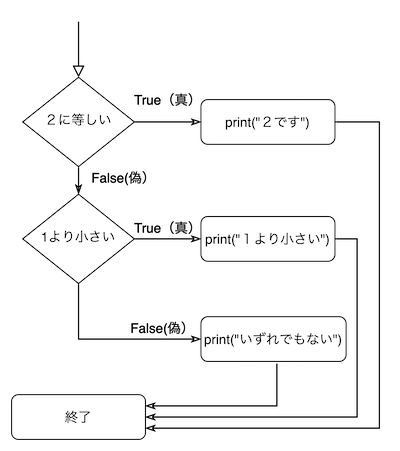

以下,例になります．number の値を適当に変えて試してみて下さい．

In [ ]:
number = 10
if number == 2:
    print("２です")
elif number < 2:
    print("２より小さいです")
else:
    print("いずれでもありません．")

いずれでもありません．


# 再帰呼び出し

再帰呼び出しとは，関数内で自分自身を呼び出すことをいいます．

再帰呼び出しでは，引数を与えないと無限ループになります．
終了条件が必要です．

再帰呼び出しを利用することで，再帰構造を持った関数の定義が容易になります．
たとえば、数列の漸化式は再帰呼び出しで作ることができます．

再帰呼び出しはループでも実現できますが，可読性は再帰呼び出しの方が良いです．


## 階乗計算

再帰呼び出しの例として階乗についてみてみましょう．

階乗は以下の式で与えられます．

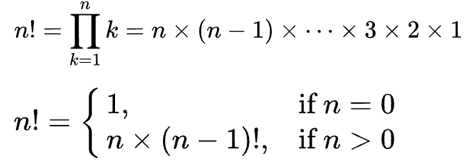

ここからも分かるように，2つめの式は漸化式です．これをプログラムで書くと次のようになります．

In [1]:
def factor1(n):
# 再帰呼び出しによる階乗計算
    if n == 0:
        return 1
    else:
        return n * factor1(n - 1)

def factor2(n):
# for 文により階乗計算
    answer = 1
    for i in range(1, n+1):
        answer = answer * i
    return answer

# print(factor1(5))
# print(factor2(5))

for i in range(10):
    print(factor1(i), factor2(i))

1 1
1 1
2 2
6 6
24 24
120 120
720 720
5040 5040
40320 40320
362880 362880


factor1(n) が再帰呼び出しで書いた関数で，factor2(n)がfor文で書いた場合になります．

いずれも実行すると同じ値を出力しますが，明らかに再帰呼び出しで書いた方が見やすいです．


---






## フィボナッチ数

フィボナッチ数は次のように定義されます．

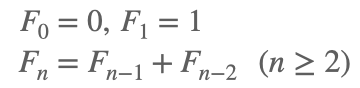

フィボナッチ数も再帰呼び出しで書くことができます．

In [2]:
def Fibonacci1(n):
# 再帰呼び出しによるフィボナッチ数列
    if n < 2:
        return n
    else:
        return Fibonacci1(n-1) + Fibonacci1(n-2)

def Fibonacci2(n):
# for文によるフィボナッチ数列
    if n<2:
        return n
    else:
        a = 1
        b = 1
        for i in range(n-2):
            total = a + b
            b = a
            a = total
        return a

# print(Fibonacci1(35))
# print(Fibonacci2(35))

for i in range(10):
    print(Fibonacci1(i), Fibonacci2(i))

0 0
1 1
1 1
2 2
3 3
5 5
8 8
13 13
21 21
34 34


# 亀さんを再帰的に動かしてフラクタルを描かせよう

それでは，タートルグラフィックスで再帰的に描画してみましょう．
ここでは，だんたんと小さくなるような図形の描画にチャレンジします．
具体的には，引数をもった関数の再帰を利用して描画していきます．

## タートルグラフィックスのインストール
まず，以下のコマンドを実行してタートルグラフィックスをインストールしてください．

タートルグラフィックスを利用するために必要ですが，最初に一度だけインストールすれば以後はインポートの必要はありません．

In [ ]:
!pip3 install ColabTurtle


## コッホ曲線

[コッホ曲線](https://ja.wikipedia.org/wiki/%E3%82%B3%E3%83%83%E3%83%9B%E6%9B%B2%E7%B7%9A)
はフラクタル図形の一つで，線分を3等分し、分割した2点を頂点とする正三角形の作図を無限に繰り返すことによって描くことができます．

以下に 1次（くり返し数1）のコッホ曲線を示します．

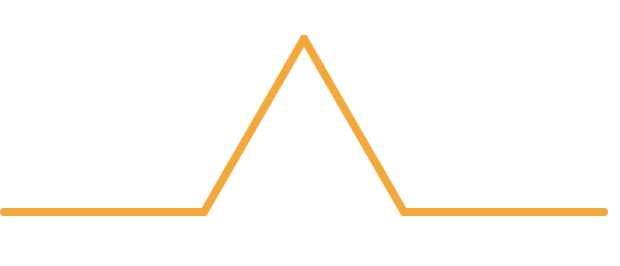

これを基本図形として，各辺を基本図形に置き換えます．

2次（くり返し数2）のコッホ曲線は以下になります．

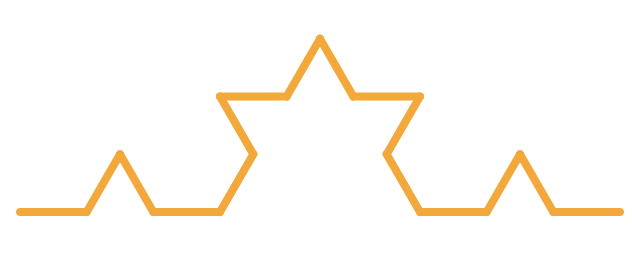

以上をくり返すことでコッホ曲線を描くことができます．

コッホ曲線の描き方は[こちら](https://ja.wikipedia.org/wiki/%E3%82%B3%E3%83%83%E3%83%9B%E6%9B%B2%E7%B7%9A)を参考にしてください．


以下のプログラムでは，コッホ曲線を4回転させることで結晶のような形を描いています．

関数 koch(n, length) の n が次数（くり返し数），length が長さです．

```if __name__ == '__main__':```はメイン関数を定義している部分です．おまじないのようなものですので，詳細な説明は省きますが，このメイン関数からkoch関数を呼び出して亀さんに描画させています．

n と length を適当に変えて試してみてください．

なお，n が大きいと描画が遅くなります．8以下にしてください．

In [ ]:
from ColabTurtle.Turtle import *
initializeTurtle()

def koch(n, length):
    if n <= 0:
        forward(length)
    else:
        koch(n-1, length/3)
        left(60)
        koch(n-1, length/3)
        right(120)
        koch(n-1, length/3)
        left(60)
        koch(n-1, length/3)

if __name__ == '__main__':
    speed(10)
    bgcolor("white")
    color("orange")
    penup()
    goto(250, 100) #亀さんを移動
    pendown()
    right(90) # 横線を引くために亀の向きを右へ
    # koch(3, 300)
# コッホ曲線を4回転させる
    for i in range(4):
        koch(3, 300)
        right(90)
    penup()
    home()

## シェルピンスキーのガスケット

シェルピンスキーのガスケットでは正三角形が基本図形になります．
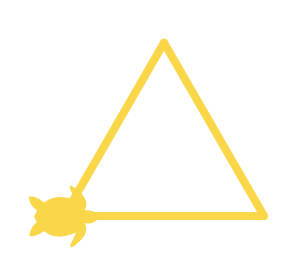

この正三角形の各辺の中心を結んで，内側に正三角形を作ります．
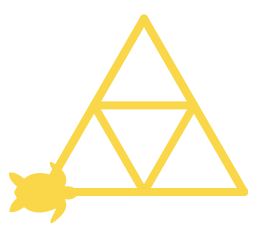

以上をくり返すことで描画していきます．

シェルピンスキーのガスケットはコッホ曲線と同じように作成できます．

詳細は[こちら](https://ja.wikipedia.org/wiki/%E3%82%B7%E3%82%A7%E3%83%AB%E3%83%94%E3%83%B3%E3%82%B9%E3%82%AD%E3%83%BC%E3%81%AE%E3%82%AE%E3%83%A3%E3%82%B9%E3%82%B1%E3%83%83%E3%83%88)をご覧下さい．

関数 Sierpinski_gasket(n, length) の n が次数（くり返し数）， length が一辺の長さです．

In [ ]:
from ColabTurtle.Turtle import *
initializeTurtle()

def Sierpinski_gasket(n, length):
    if n <= 0:
        # ここを考えよう
    else:
        Sierpinski_gasket(n-1, length/2) # 一辺を半分に
        forward(length) # 直線を描く
        left(120) # 120度左に
        Sierpinski_gasket(n-1, length/2)
        forward(length)
        left(120) 
        Sierpinski_gasket(n-1, length/2)
        forward(length)
        left(120) 
   
if __name__ == '__main__':
    speed(1)
    bgcolor("DarkRed")
    color("Gold")
    penup()
    goto(200,400) #亀さんを移動
    pendown()
    right(90) # 横線を引くために亀の向きを右へ
    Sierpinski_gasket(2, 400)
    penup()
    home()

IndentationError: ignored

## 二分木

二本木は名前のごとく1つの幹と2つの枝を基本図とします．

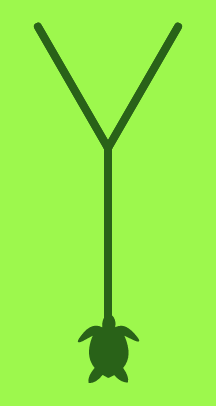

次の次数（くり返し）では，この2つの枝を新たの幹として2つの枝を伸ばしていきます．

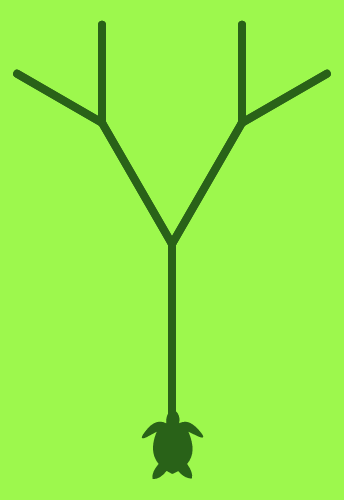

以上をくり返すことで枝を伸ばして木を描いていきます．

In [ ]:
from ColabTurtle.Turtle import *
initializeTurtle()

def binary_tree(n, length, angle):
    if n > 0:
        forward(length)
        right(angle)
        binary_tree(n-1, length * 0.7, angle)
        left(angle * 2)
        binary_tree(n-1, length * 0.7, angle)
        right(angle)
        backward(length)

if __name__ == '__main__':
    # speed(13)
    bgcolor("LawnGreen")
    color("DarkGreen")
    penup()
    goto(400,400) #亀さんを移動
    pendown()
    binary_tree(3, 100, 30)


## Levy曲線

[Levy曲線](https://ja.wikipedia.org/wiki/%E3%83%AC%E3%83%B4%E3%82%A3C%E6%9B%B2%E7%B7%9A)はフラクタルの一種で，自己相似性という性質を持っている図形で，代表的なものに，マンデルブロ集合というものがあります．

Leby曲線は次のように描きます．


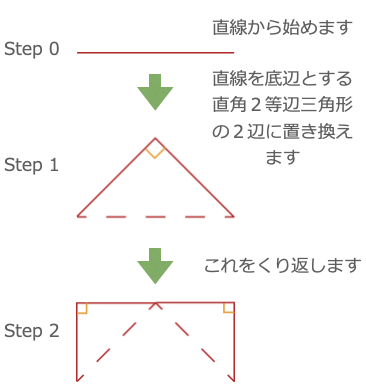

それでは，亀さんにLevy曲線を描いてもらいましょう．

関数 levy(length, n) を完成させてください．
ここで， length は一辺の長さで n は次数（くり返し数）です．

In [ ]:
from ColabTurtle.Turtle import *
from math import sqrt
initializeTurtle()

def levy(length,n):
    if n == 0:
        forward(length)
    else:
        # ここを考えよう

if __name__ == '__main__':
    speed(13)
    bgcolor("DarkRed")
    color("Gold")
    penup()
    goto(250, 350) #亀さんを移動
    pendown()
    right(90) # 横線を引くために亀の向きを右へ
    levy(300,10)
    penup()
    home()

## Dragon曲線

[Dragon曲線](https://ja.wikipedia.org/wiki/%E3%83%89%E3%83%A9%E3%82%B4%E3%83%B3%E6%9B%B2%E7%B7%9A)
もLevy曲線同様に再帰法を用いて構成することの出来る、自己相似性フラクタルです．

Drangon曲線は次のように描きます．
* まず直線を描きます
* 次に直線をそれを底辺とする直角二等辺三角形の２辺に置き換えて描きます
* 以降は、交互に上下に入れ替わった辺で置き換え描きます
* これを繰り返します

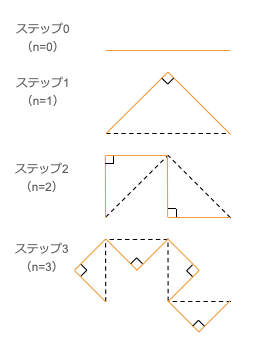

それでは，亀さんにDragon曲線を描いてもらいましょう．

関数 draw_dragon(length, n, sign) を完成させてください． 
ここで， length は一辺の長さで n は次数（くり返し数）です．
また， sign は符号（+1あるいは-1）です．

In [ ]:
from ColabTurtle.Turtle import *
from math import sqrt
initializeTurtle()

def draw_dragon(length, n, sign):
    if n == 0:
        forward(length)
    else:
        # ここを考えよう

if __name__ == '__main__':
    speed(13)
    color("DarkRed")
    bgcolor("Gold")
    penup()
    goto(300, 200) #亀さんを移動
    pendown()
    rigth(90) # 亀の向きを右へ
    draw_dragon(200,9,1)
    penup()
    home()

IndentationError: ignored